In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import pandas as pd
from astropy import units as u
from astropy import constants
import math
import astropy.io.fits as pyfits
from astropy.wcs import WCS
from radio_beam import Beam

from radmc3dPy import image

# Read Q factor

In [2]:
filename = './dust_scat_pol_image/disk_properties.dat'
disk_properties = open(filename,'r')
disk_properties = disk_properties.readlines()

disk_properties_list = []
for i in range(len(disk_properties)):
    aa = disk_properties[i].split()
    for j in range(len(aa)):
        aa[j] = float(aa[j])
        
    disk_properties_list.append(aa)
    
disk_properties_list = np.array(disk_properties_list)

Text(0.5, 1.0, 'Toomre parameter in mid-plane')

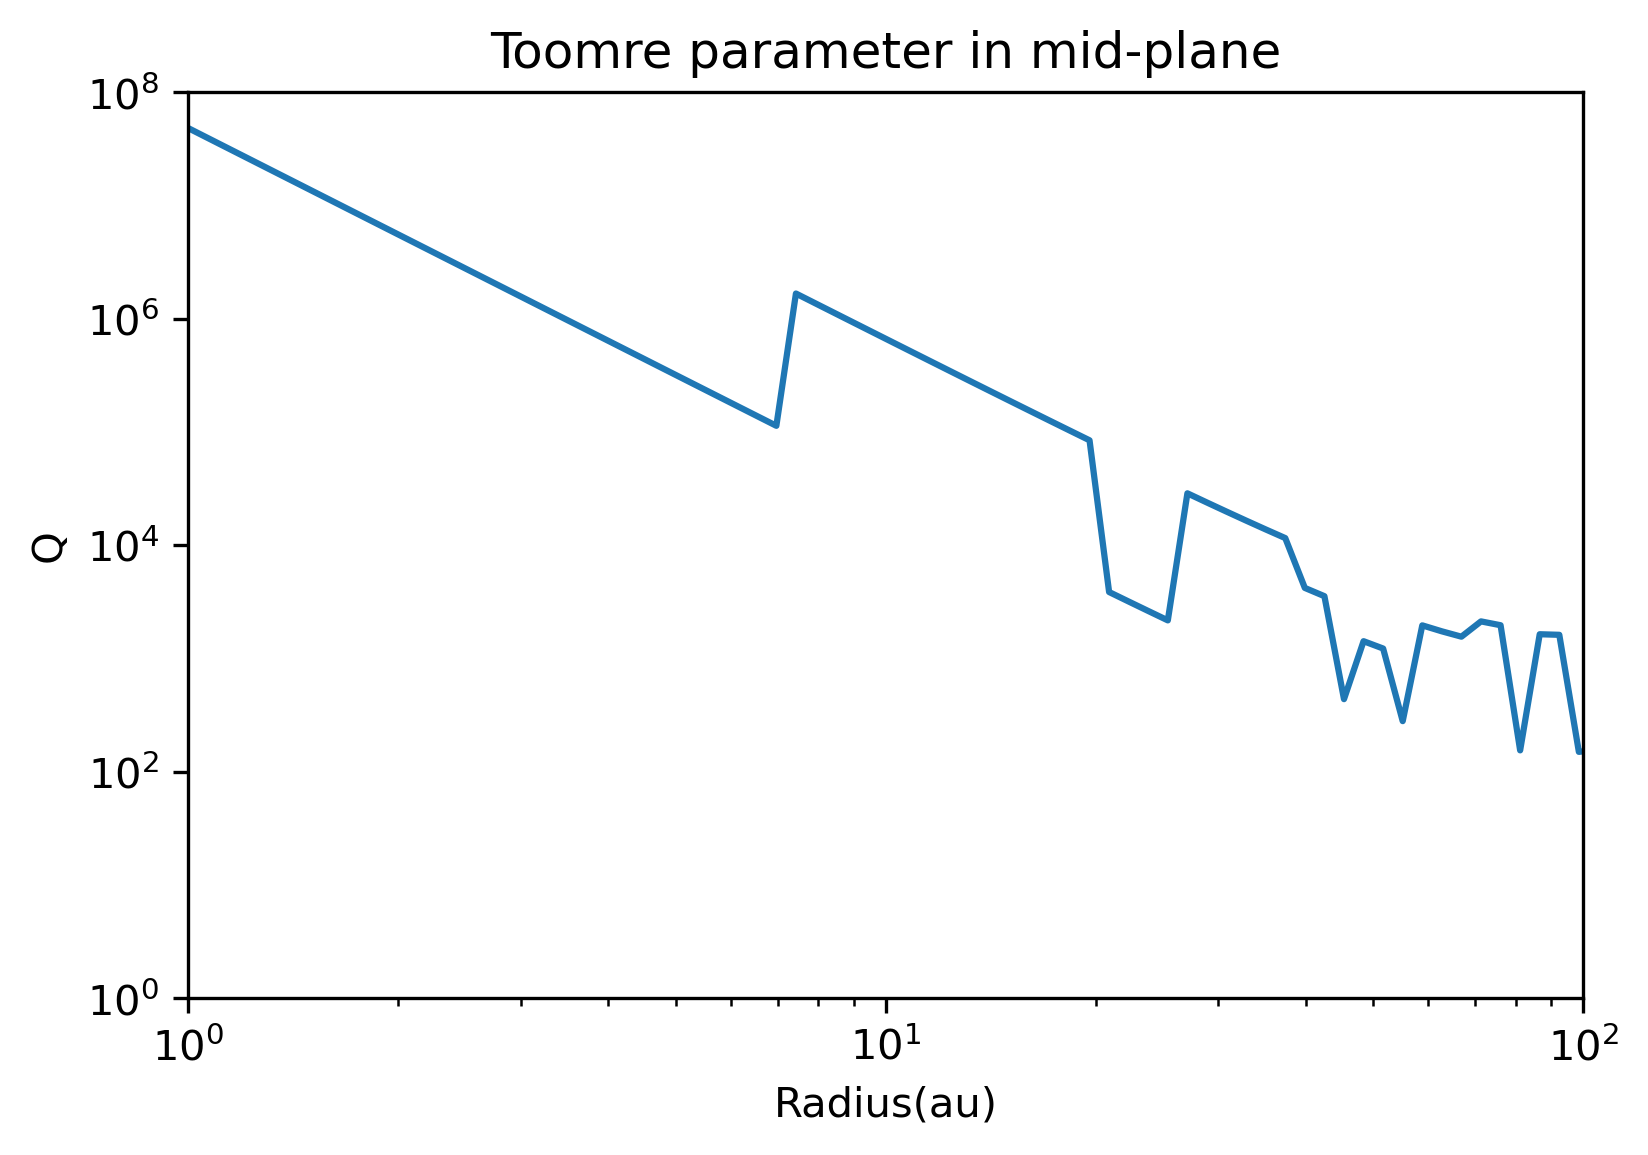

In [3]:
plt.figure(dpi=300)
plt.plot(disk_properties_list[:,0],disk_properties_list[:,4])
plt.xlim([1,100])
plt.ylim([1,100000000])
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Q')
plt.xlabel('Radius(au)')
plt.title('Toomre parameter in mid-plane')

# Plot radmc3d image

In [4]:
#simulation image constant
_h = constants.h.cgs.value
_c = constants.c.cgs.value
_k_B = constants.k_B.cgs.value

distance = 140 #pc
au_cm = 1.49597871e13
pixsize_cm = 17554181713809.967  #cm/pixel
pixsize_au = pixsize_cm/au_cm
pixsize_arcs = pixsize_cm/(1.496e13*distance) 
allsize_arcs = pixsize_arcs*300
allsize_arcs

2.514445432650396

In [102]:
def read_image(path):
    data = pd.read_csv(path)
    data = np.array(data[4:])
    data_=[]
    for i in range(len(data)):
        split = data[i][0].split( )
        data_.append(float(split[0]))

    data_ = np.reshape(data_, (300, 300))
    #major_data_ = data_[149,:]
    return data_

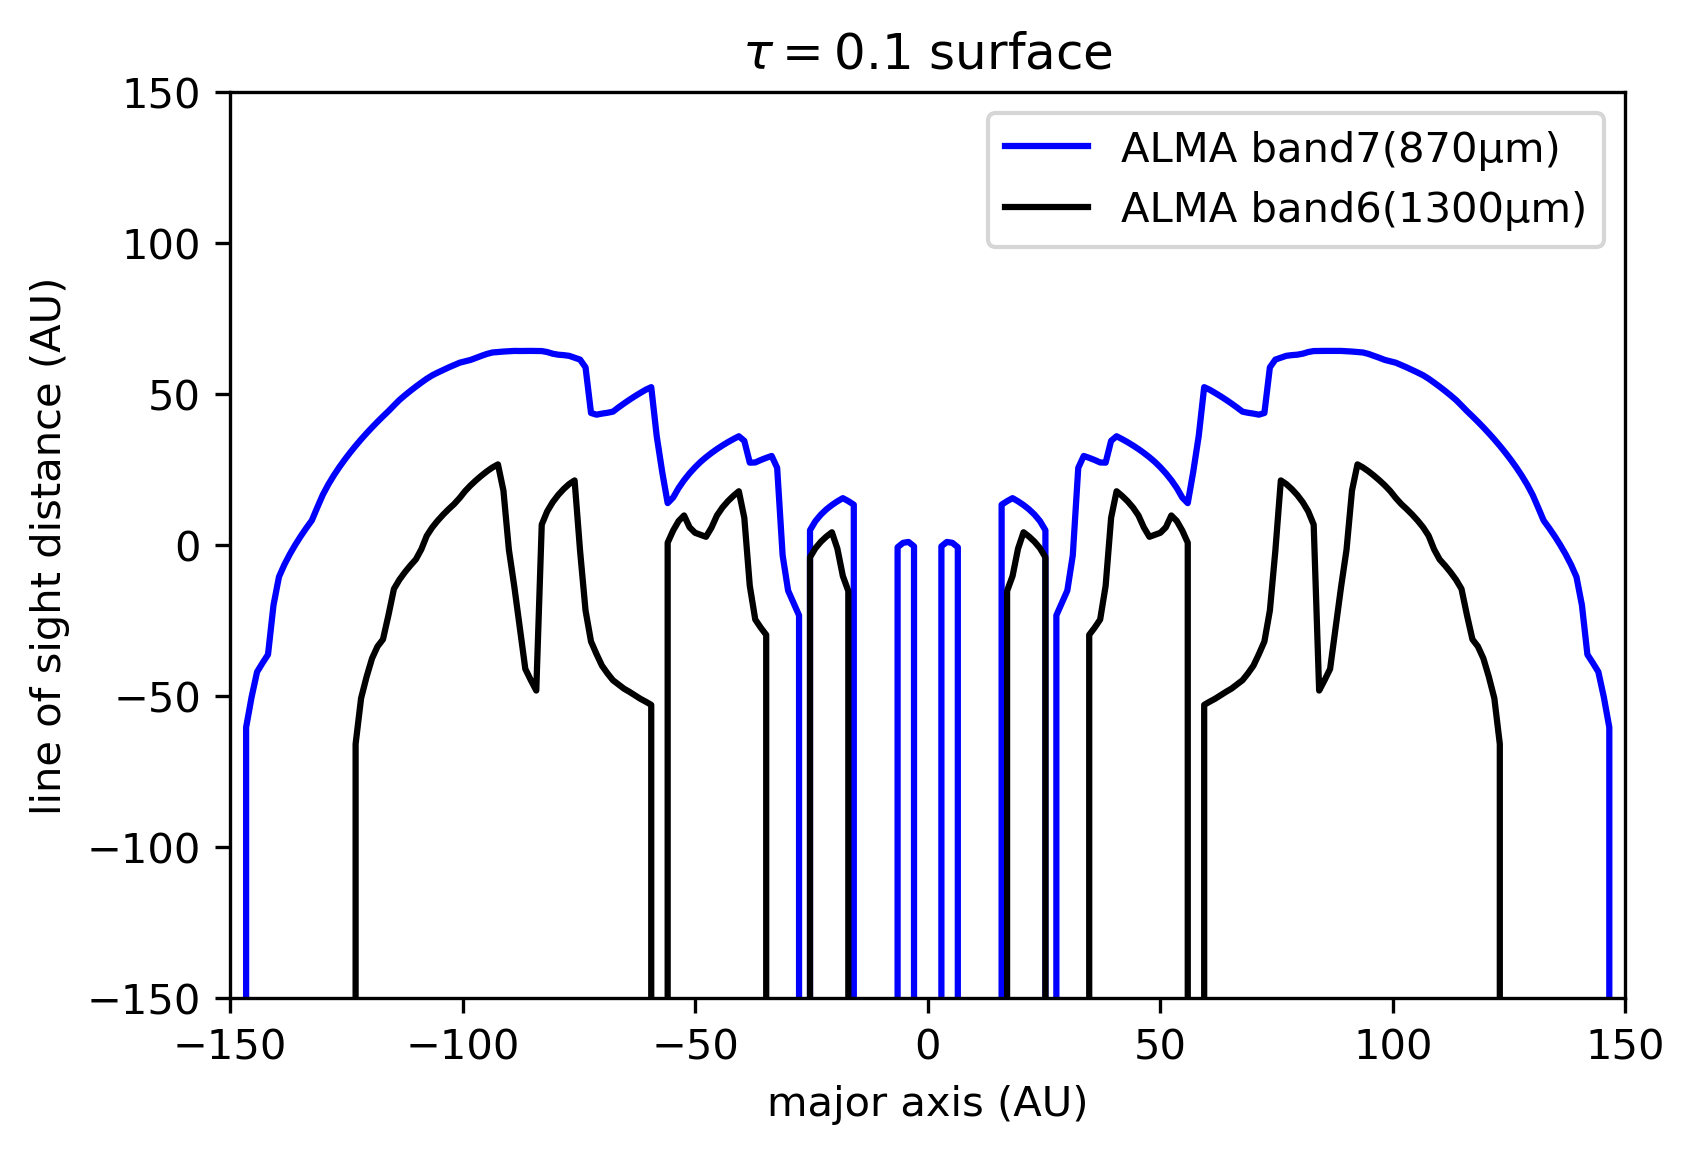

In [6]:
plt.figure(dpi=300)
tau_maj_b7 = read_image("./dust_scat_pol_image/image_tau_b7.out")[149,:]/au_cm  #distance_au
tau_maj_b6 = read_image("./dust_scat_pol_image/image_tau_b6.out")[149,:]/au_cm  #distance_au
tau_maj_b3 = read_image("./dust_scat_pol_image/image_tau_b3.out")[149,:]/au_cm  #distance_au
b = np.linspace(-150,150,300)*pixsize_au #radius_au
plt.plot(b,tau_maj_b7,c='b',label='ALMA band7(870μm)')
plt.plot(b,tau_maj_b6,c='black',label='ALMA band6(1300μm)')
#plt.plot(b,tau_maj_b3,c='r',label='ALMA band3(3100μm)')
plt.ylim([-150,150])
plt.xlim([-150,150])
plt.xlabel('major axis (AU)')
plt.ylabel('line of sight distance (AU)')
plt.title(r'$\tau = 0.1 $ surface')
plt.legend()

# Plot polarization map

In [120]:
data = pd.read_csv("./dust_scat_pol_image/image_sca_b7.out")
data_ = data[4:]
data_ = np.array(data_)
data_.shape

(90000, 1)

In [121]:
i_data = []
q_data = []
u_data = []
v_data = []
for i in range(len(data_)):
    split = data_[i][0].split( )
    i_data.append(float(split[0]))
    q_data.append(float(split[1]))
    u_data.append(float(split[2]))
    v_data.append(float(split[3]))

i_data = np.array(i_data)
q_data = np.array(q_data)
u_data = np.array(u_data)
v_data = np.array(v_data)

i_data = np.reshape(i_data, (300, 300))
q_data = np.reshape(q_data, (300, 300))
u_data = np.reshape(u_data, (300, 300))
v_data = np.reshape(v_data, (300, 300))

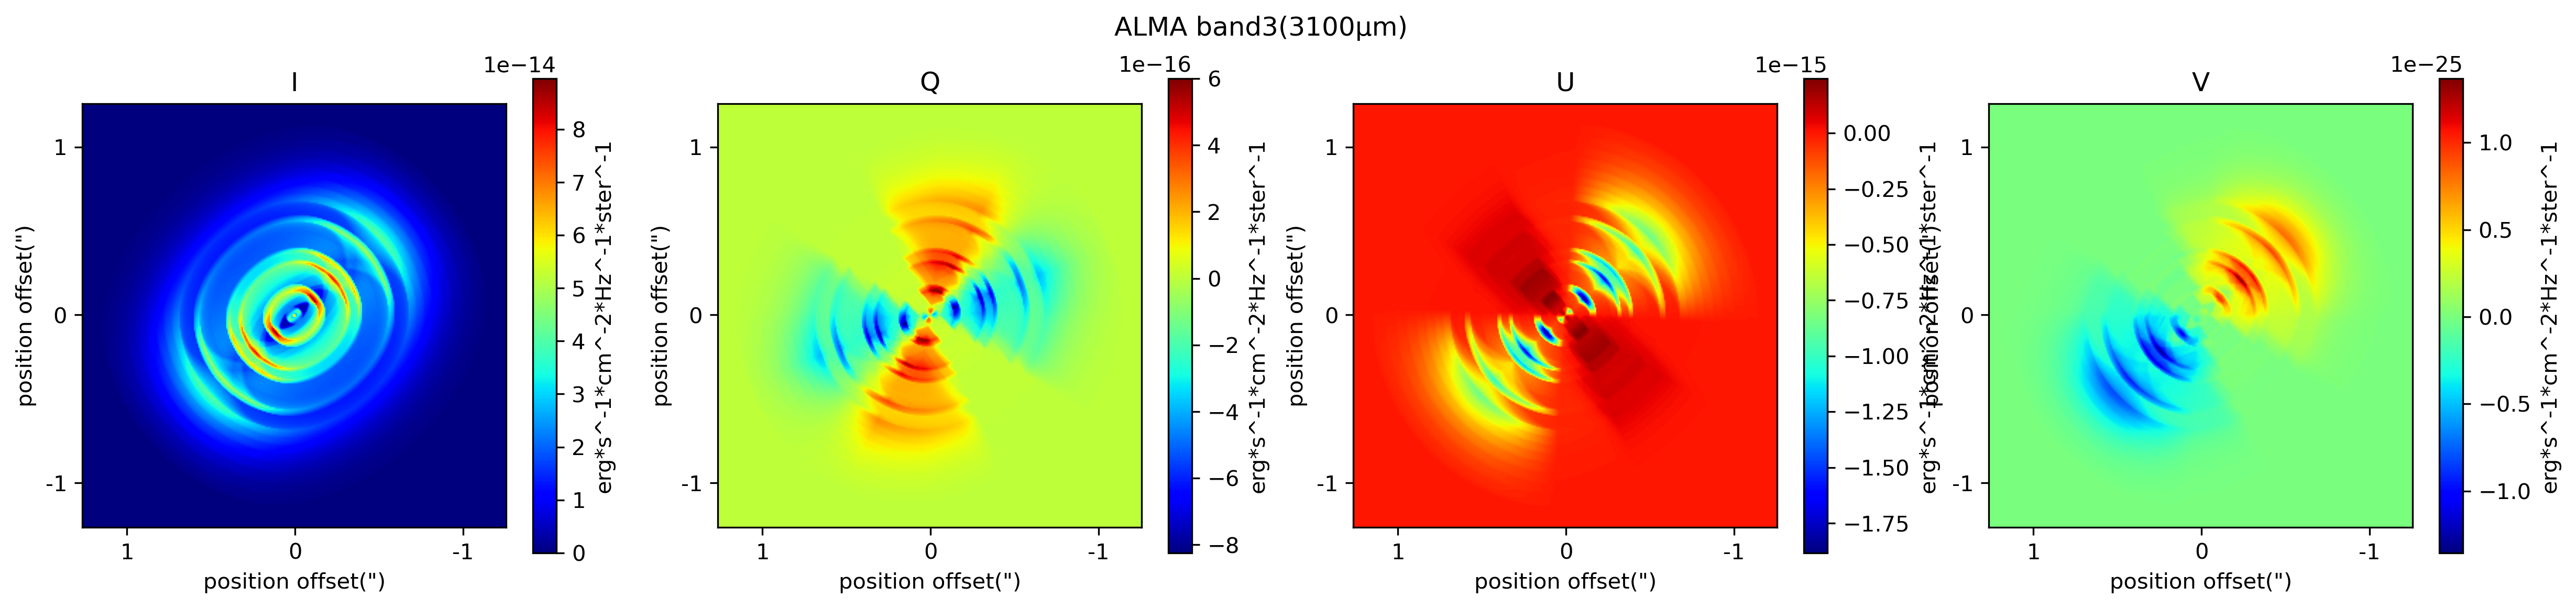

In [122]:
plt.figure(figsize = (20,4),dpi = 300)

plt.subplot(1,4,1)
plt.imshow(i_data ,cmap='jet',origin='lower') 
plt.xticks([150-int(1/pixsize_arcs),150,150+int(1/pixsize_arcs)],[1,0,-1])
plt.yticks([150-int(1/pixsize_arcs),150,150+int(1/pixsize_arcs)],[-1,0,1])
plt.xlabel('position offset(")')
plt.ylabel('position offset(")')
plt.colorbar().set_label('erg*s^-1*cm^-2*Hz^-1*ster^-1')
#plt.colorbar()
plt.title('I')

plt.subplot(1,4,2)
plt.imshow(q_data,cmap='jet',origin='lower') 
plt.xticks([150-int(1/pixsize_arcs),150,150+int(1/pixsize_arcs)],[1,0,-1])
plt.yticks([150-int(1/pixsize_arcs),150,150+int(1/pixsize_arcs)],[-1,0,1])
plt.xlabel('position offset(")')
plt.ylabel('position offset(")')
plt.colorbar().set_label('erg*s^-1*cm^-2*Hz^-1*ster^-1')
#plt.colorbar()
plt.title('Q')

plt.subplot(1,4,3)
plt.imshow(u_data,cmap='jet',origin='lower') 
plt.xticks([150-int(1/pixsize_arcs),150,150+int(1/pixsize_arcs)],[1,0,-1])
plt.yticks([150-int(1/pixsize_arcs),150,150+int(1/pixsize_arcs)],[-1,0,1])
plt.xlabel('position offset(")')
plt.ylabel('position offset(")')
plt.colorbar().set_label('erg*s^-1*cm^-2*Hz^-1*ster^-1')
#plt.colorbar()
plt.title('U')

plt.subplot(1,4,4)
plt.imshow(v_data,cmap='jet',origin='lower')
plt.xticks([150-int(1/pixsize_arcs),150,150+int(1/pixsize_arcs)],[1,0,-1])
plt.yticks([150-int(1/pixsize_arcs),150,150+int(1/pixsize_arcs)],[-1,0,1])
plt.xlabel('position offset(")')
plt.ylabel('position offset(")')
plt.colorbar().set_label('erg*s^-1*cm^-2*Hz^-1*ster^-1')
#plt.colorbar()
plt.title('V')

plt.suptitle('ALMA band7(870μm)')

plt.show()

/data/yingchihu/conda/envs/galario3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/data/yingchihu/conda/envs/galario3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Ploarized intensity')

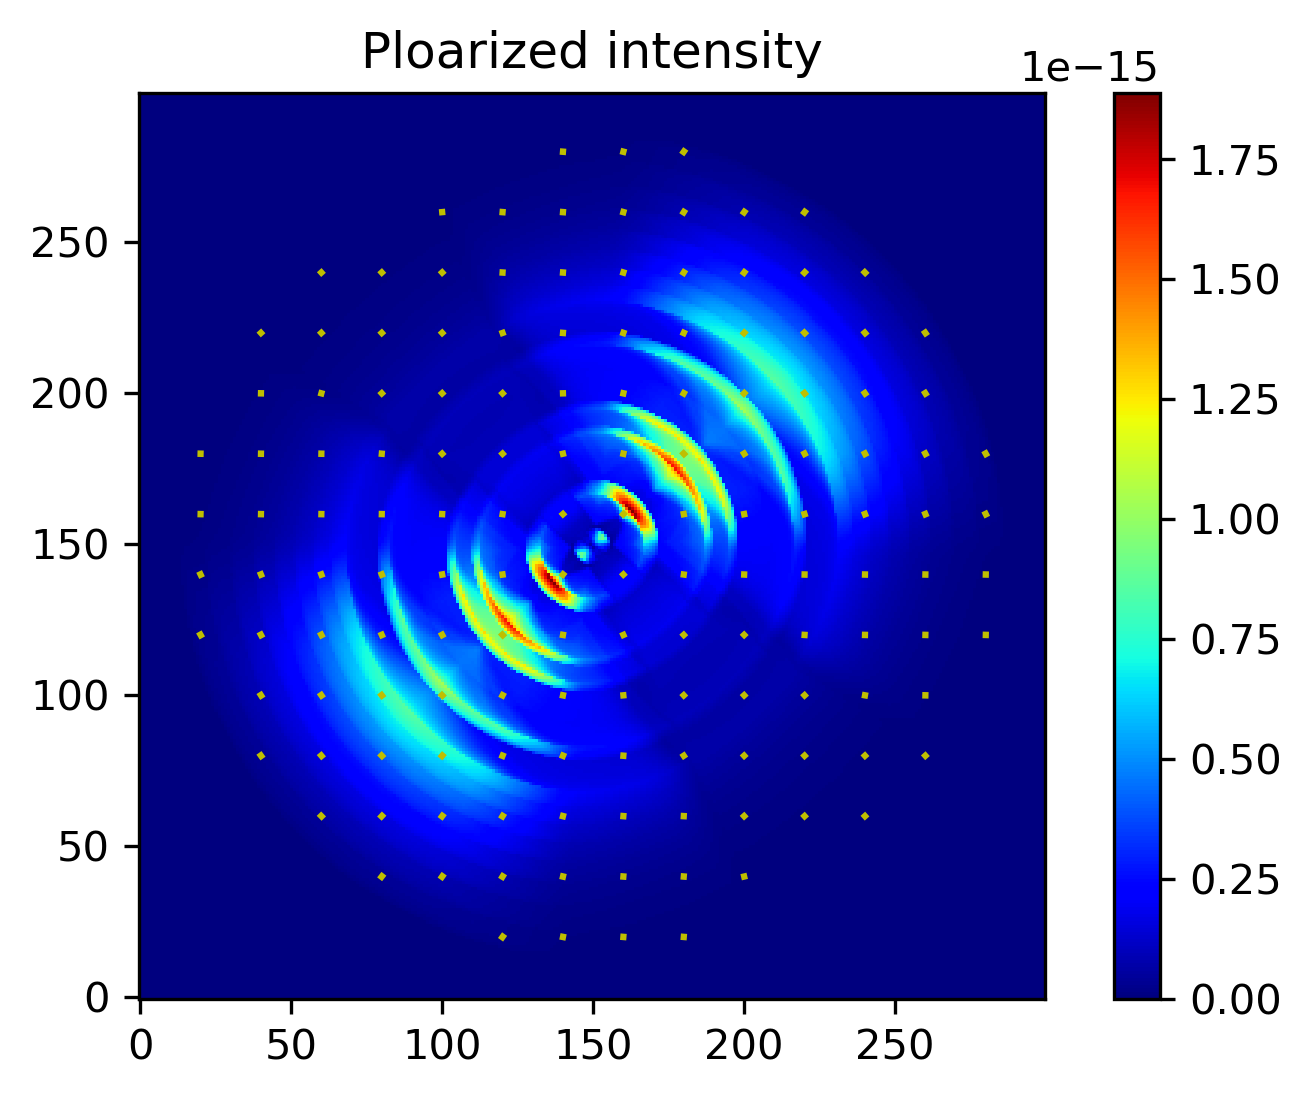

In [123]:
l_ploar_i = np.sqrt(q_data**2+u_data**2)  #polarization intensity(cgs)
d_ploar = l_ploar_i/i_data #degree of polarization

p_p_a = (np.arctan(u_data/q_data))*0.5 #polarization angle


plt.figure(dpi = 300)
#p_p_a_l = np.zeros((10,10))
factor = 10
for i in range(15):
    w = 20*i
    for j in range(15):
        q = 20*j
        if np.abs(p_p_a[q,w]) > 0:
            y = [q-math.cos(p_p_a[q,w])*0.5*d_ploar[q,w]*factor,q+math.cos(p_p_a[q,w])*0.5*d_ploar[q,w]*factor]
            x = [w+math.sin(p_p_a[q,w])*0.5*d_ploar[q,w]*factor,w-math.sin(p_p_a[q,w])*0.5*d_ploar[q,w]*factor]
            #print(q,w)
            
            plt.plot(x,y,c = 'y')
        

plt.imshow(l_ploar_i,cmap='jet',origin='lower')
#plt.colorbar().set_label('K')
plt.colorbar()


x = range(300)
y = range(300)
X, Y = np.meshgrid(x, y)
#plt.contour(X, Y, i_data,  10, colors='White')

plt.title('Ploarized intensity')

# Convolve with beam

In [124]:
from astropy.convolution import convolve
from astropy.convolution import Gaussian2DKernel

##beam size of ALMA b7,b6,b3 for Gaussian smoothing
bmaj_b7 = 0.44 #arcsec
bmin_b7 = 0.35 #arcsec
#bmaj_b7 = 0.044 #arcsec
#bmin_b7 = 0.035 #arcsec
pos_b7 = 90+(-17.9) #degree (from +X direction;conterclockwise positive)
bmaj_b6 = 0.37 #arcsec
bmin_b6 = 0.24 #arcsec
pos_b6 = 90+(-44.1) #degree
bmaj_b3 = 0.51 #arcsec
bmin_b3 = 0.41 #arcsec
pos_b3 = 90+(-67.6) #degree



##beam kernel
b7_kernel = Gaussian2DKernel(x_stddev=(bmaj_b7/pixsize_arcs)/2.355,y_stddev=(bmin_b7/pixsize_arcs)/2.355,theta=(pos_b7)*(np.pi/180))
b6_kernel = Gaussian2DKernel(x_stddev=(bmaj_b6/pixsize_arcs)/2.355,y_stddev=(bmin_b6/pixsize_arcs)/2.355,theta=(pos_b6)*(np.pi/180))
b3_kernel = Gaussian2DKernel(x_stddev=(bmaj_b3/pixsize_arcs)/2.355,y_stddev=(bmin_b3/pixsize_arcs)/2.355,theta=(pos_b3)*(np.pi/180))


In [125]:
i_data_convol = convolve(i_data,b7_kernel)
q_data_convol = convolve(q_data,b7_kernel)
u_data_convol = convolve(u_data,b7_kernel)
v_data_convol = convolve(v_data,b7_kernel)
bmaj_rad = np.pi*(bmaj_b7/3600)/180 #rad
bmin_rad = np.pi*(bmin_b7/3600)/180 #rad

i_data_convol_to_jy_beam = i_data_convol*(np.pi*bmaj_rad*bmin_rad)/(4*np.log(2))/1e-23
q_data_convol_to_jy_beam = q_data_convol*(np.pi*bmaj_rad*bmin_rad)/(4*np.log(2))/1e-23
u_data_convol_to_jy_beam = u_data_convol*(np.pi*bmaj_rad*bmin_rad)/(4*np.log(2))/1e-23
v_data_convol_to_jy_beam = v_data_convol*(np.pi*bmaj_rad*bmin_rad)/(4*np.log(2))/1e-23


#lamda = 8700*1e-4 #lamda(cm)
#mu = _c/lamda
#i_data_convol_k = _h*mu/(_k_B*np.log(2*_h*mu**3/(i_data_convol/(np.pi*bmaj_rad*bmin_rad)*4*np.log(2)*1e-23*_c**2)+1))

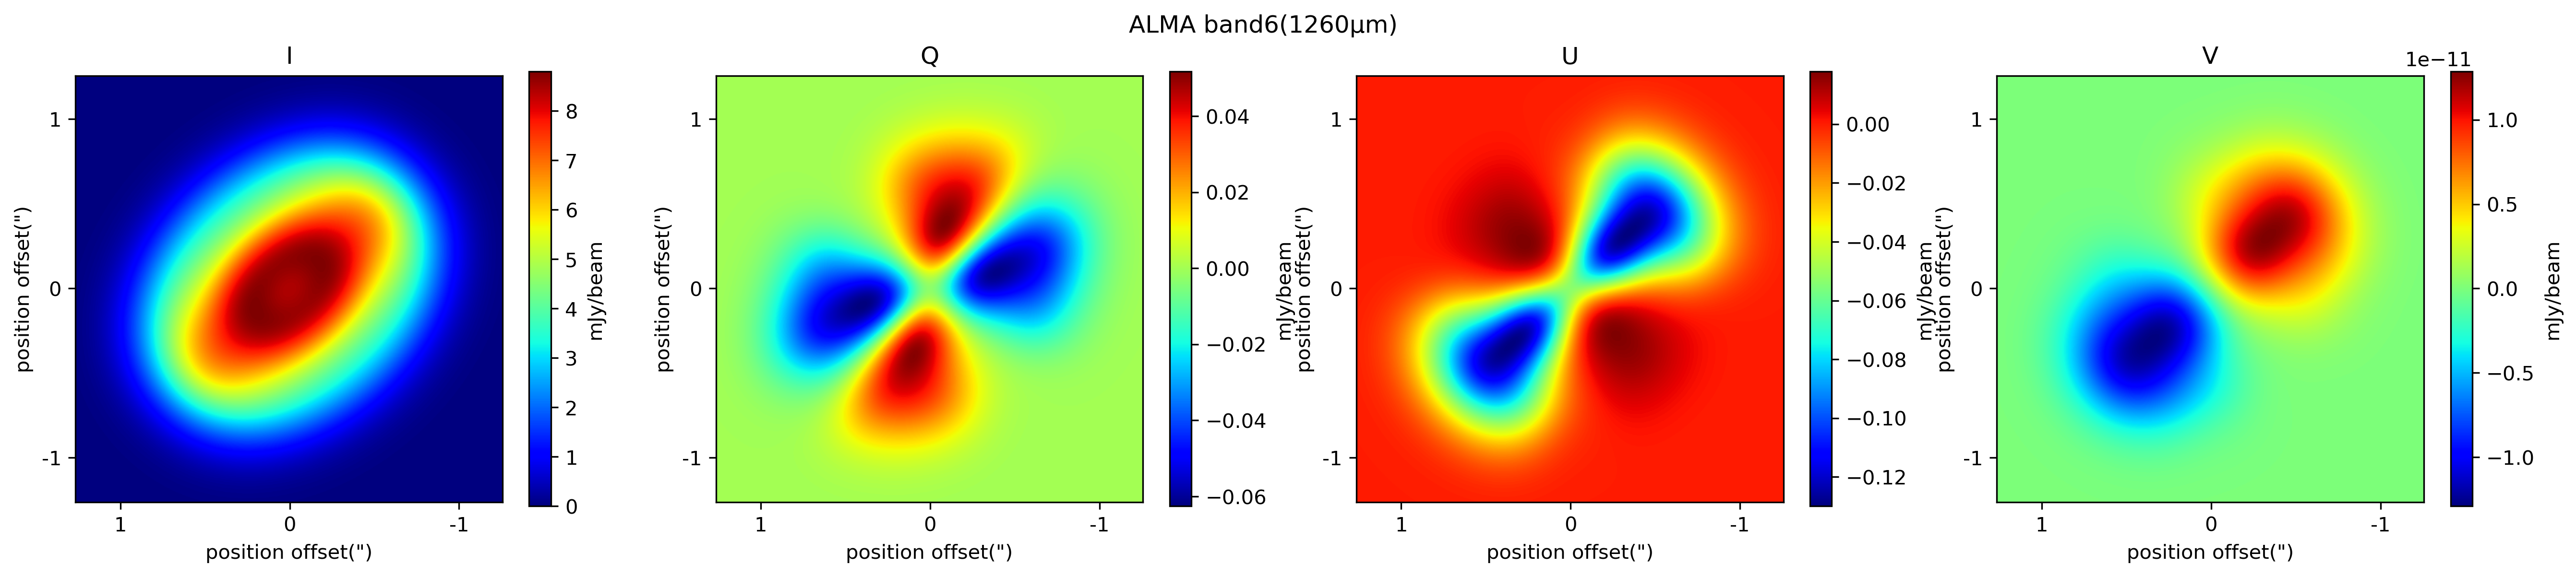

In [126]:
plt.figure(figsize = (22,4),dpi = 300)

plt.subplot(1,4,1)
plt.imshow(i_data_convol_to_jy_beam*1000,cmap='jet',origin='lower') 
plt.xticks([150-int(1/pixsize_arcs),150,150+int(1/pixsize_arcs)],[1,0,-1])
plt.yticks([150-int(1/pixsize_arcs),150,150+int(1/pixsize_arcs)],[-1,0,1])
plt.xlabel('position offset(")')
plt.ylabel('position offset(")')
plt.colorbar().set_label('mJy/beam')
#plt.colorbar()
plt.title('I')

plt.subplot(1,4,2)
plt.imshow(q_data_convol_to_jy_beam*1000,cmap='jet',origin='lower') 
plt.xticks([150-int(1/pixsize_arcs),150,150+int(1/pixsize_arcs)],[1,0,-1])
plt.yticks([150-int(1/pixsize_arcs),150,150+int(1/pixsize_arcs)],[-1,0,1])
plt.xlabel('position offset(")')
plt.ylabel('position offset(")')
plt.colorbar().set_label('mJy/beam')
#plt.colorbar()
plt.title('Q')

plt.subplot(1,4,3)
plt.imshow(u_data_convol_to_jy_beam*1000,cmap='jet',origin='lower') 
plt.xticks([150-int(1/pixsize_arcs),150,150+int(1/pixsize_arcs)],[1,0,-1])
plt.yticks([150-int(1/pixsize_arcs),150,150+int(1/pixsize_arcs)],[-1,0,1])
plt.xlabel('position offset(")')
plt.ylabel('position offset(")')
plt.colorbar().set_label('mJy/beam')
#plt.colorbar()
plt.title('U')

plt.subplot(1,4,4)
plt.imshow(v_data_convol_to_jy_beam*1000,cmap='jet',origin='lower')
plt.xticks([150-int(1/pixsize_arcs),150,150+int(1/pixsize_arcs)],[1,0,-1])
plt.yticks([150-int(1/pixsize_arcs),150,150+int(1/pixsize_arcs)],[-1,0,1])
plt.xlabel('position offset(")')
plt.ylabel('position offset(")')
plt.colorbar().set_label('mJy/beam')
#plt.colorbar()
plt.title('V')

plt.suptitle('ALMA band7(870μm)')

plt.show()

/data/yingchihu/conda/envs/galario3/lib/python3.7/site-packages/numpy/core/shape_base.py:65: UserWarning: Warning: converting a masked element to nan.
  ary = asanyarray(ary)


Text(0.5, 1.0, 'ALMA band6(1260μm)')

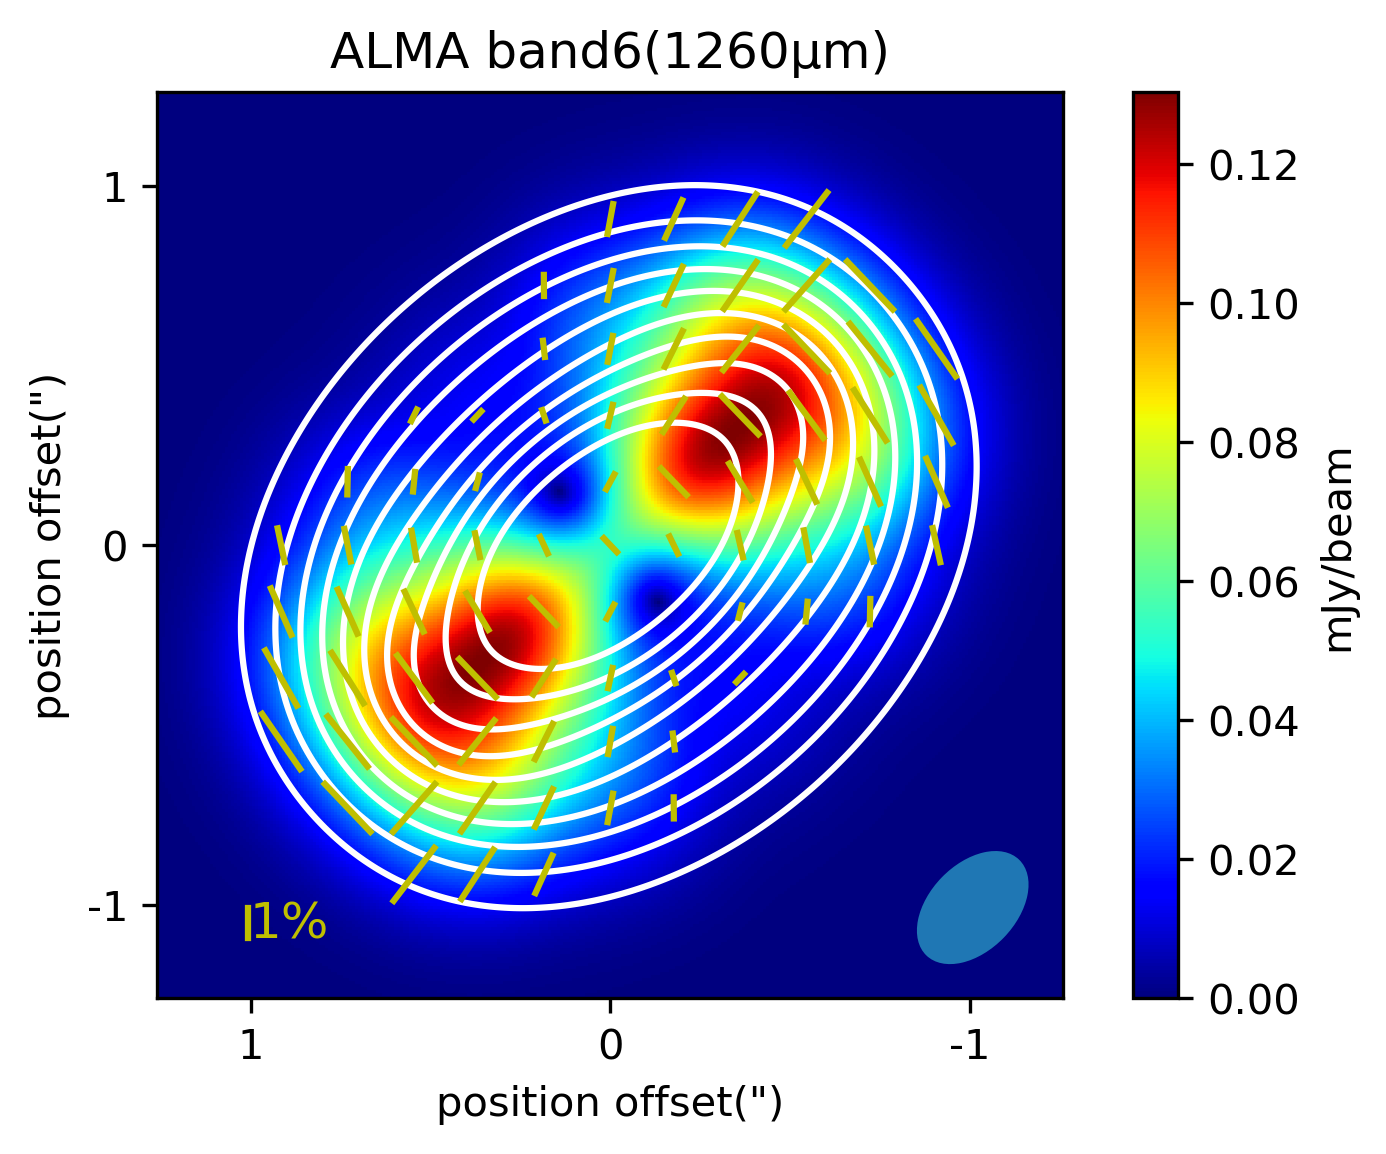

In [127]:
from astropy.stats import SigmaClip
from photutils.background import StdBackgroundRMS

l_ploar_i_convol_to_jy_beam = np.sqrt(q_data_convol_to_jy_beam**2+u_data_convol_to_jy_beam**2)  #polarization intensity(cgs)
d_ploar_convol = l_ploar_i_convol_to_jy_beam/i_data_convol_to_jy_beam #degree of polarization

bkgrms = StdBackgroundRMS(SigmaClip(sigma=3.0))
bkgrms_value = bkgrms.calc_background_rms(l_ploar_i_convol_to_jy_beam)
d_ploar_mask_convol = np.ma.masked_where(l_ploar_i_convol_to_jy_beam <= bkgrms_value, d_ploar_convol)

p_p_a_convol = (np.arctan(u_data_convol_to_jy_beam/q_data_convol_to_jy_beam))*0.5 #polarization angle

fig = plt.figure(dpi = 300)
ax = fig.add_subplot(111, aspect='equal')

x = range(300)
y = range(300)
X, Y = np.meshgrid(x, y)
plt.contour(X, Y, i_data_convol_to_jy_beam,  10, colors='White')

factor = 1000
for i in np.linspace(1,14,13):
    w = int(20*i)
    for j in np.linspace(1,14,13):
        q = int(20*j)
        if np.abs(p_p_a_convol[q,w]) > 0:
            y = [q-math.cos(p_p_a_convol[q,w])*0.5*d_ploar_mask_convol[q,w]*factor,q+math.cos(p_p_a_convol[q,w])*0.5*d_ploar_mask_convol[q,w]*factor]
            x = [w+math.sin(p_p_a_convol[q,w])*0.5*d_ploar_mask_convol[q,w]*factor,w-math.sin(p_p_a_convol[q,w])*0.5*d_ploar_mask_convol[q,w]*factor]
            #print(q,w)
            
            plt.plot(x,y,c = 'y')
        

plt.imshow(l_ploar_i_convol_to_jy_beam*1000,cmap='jet',origin='lower')
plt.xticks([150-int(1/pixsize_arcs),150,150+int(1/pixsize_arcs)],[1,0,-1])
plt.yticks([150-int(1/pixsize_arcs),150,150+int(1/pixsize_arcs)],[-1,0,1])
plt.xlabel('position offset(")')
plt.ylabel('position offset(")')
e = Ellipse(xy = (270,30), width = bmaj_b6/pixsize_arcs, height = bmin_b6/pixsize_arcs, angle=pos_b6)
ax.add_patch(e)
plt.colorbar().set_label('mJy/beam')
#plt.colorbar()

plt.plot([30,30],[20,20+factor*0.01],c = 'y')
plt.text(30.5, 20, "1%",fontsize=12,color = "y")
plt.xlim([0,300])
plt.ylim([0,300])


plt.title('ALMA band7(870μm)')